In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from synergy.combination import Bliss
import numpy as np
plt.rcParams.update({'font.size': 15})

In [13]:
# RAFi_MEKi_with_SOS_feedback_and_CRAF_feedback
# RAFi_MEKi_with_SOS_feedback_no_CRAF_feedback
dr_df_w_BRAF = pd.read_csv("dose_response_df/brange_RAFi_MEKi_BRAFV600E")
dr_df_w_CRAF = pd.read_csv("dose_response_df/brange_RAFi_MEKi_with_SOS_feedback_and_CRAF_feedback")
params = list(dr_df_w_BRAF.columns)[2:]
params = ['pMEK', 'pERK']
#params = ['pMEK_obs', 'pERK_obs']

    RAFi_0_uM  MEKi_0_uM      pMEK  pMEK_obs      pERK  pERK_obs
0    0.000000   0.000000  0.055957  0.281050  0.133659  0.447836
1    0.000000   0.001778  0.021836  0.109672  0.067043  0.224634
2    0.000000   0.003924  0.012692  0.063749  0.036769  0.123197
3    0.000000   0.008660  0.007082  0.035570  0.018392  0.061625
4    0.000000   0.019110  0.004140  0.020795  0.008771  0.029388
..        ...        ...       ...       ...       ...       ...
95   3.162278   0.042170  0.000464  0.002330  0.000712  0.002387
96   3.162278   0.093057  0.000329  0.001654  0.000303  0.001014
97   3.162278   0.205353  0.000264  0.001328  0.000128  0.000430
98   3.162278   0.453158  0.000229  0.001150  0.000054  0.000182
99   3.162278   1.000000  0.000203  0.001019  0.000022  0.000075

[100 rows x 6 columns]


pMEK
[[0.         0.02804776 0.02988518 0.03211034 0.03397616 0.03355467
  0.0264118  0.01421285 0.00710295 0.00349317]
 [0.         0.05170225 0.05570647 0.06078915 0.06535872 0.06535155
  0.0517324  0.02778867 0.01386833 0.00681828]
 [0.         0.07928766 0.08817806 0.1004172  0.11258513 0.11603842
  0.09309951 0.04991628 0.0248527  0.01220816]
 [0.         0.07890166 0.0957435  0.1229862  0.15466517 0.17244229
  0.14323307 0.07681449 0.0381375  0.01870817]
 [0.         0.06338413 0.0689789  0.08223133 0.12425979 0.17715876
  0.16316607 0.08808624 0.04364279 0.02138901]
 [0.         0.04600609 0.04948544 0.0542667  0.06443737 0.11708743
  0.13901062 0.07650836 0.03791136 0.01858121]
 [0.         0.02608359 0.02923745 0.03354304 0.03893284 0.05874486
  0.09937433 0.05667283 0.02819489 0.01383786]
 [0.         0.01255219 0.01481354 0.01815902 0.02212052 0.02979418
  0.06068819 0.03629573 0.01817945 0.00894485]
 [0.         0.0056092  0.00692883 0.00897726 0.01144849 0.01507181
  0.032

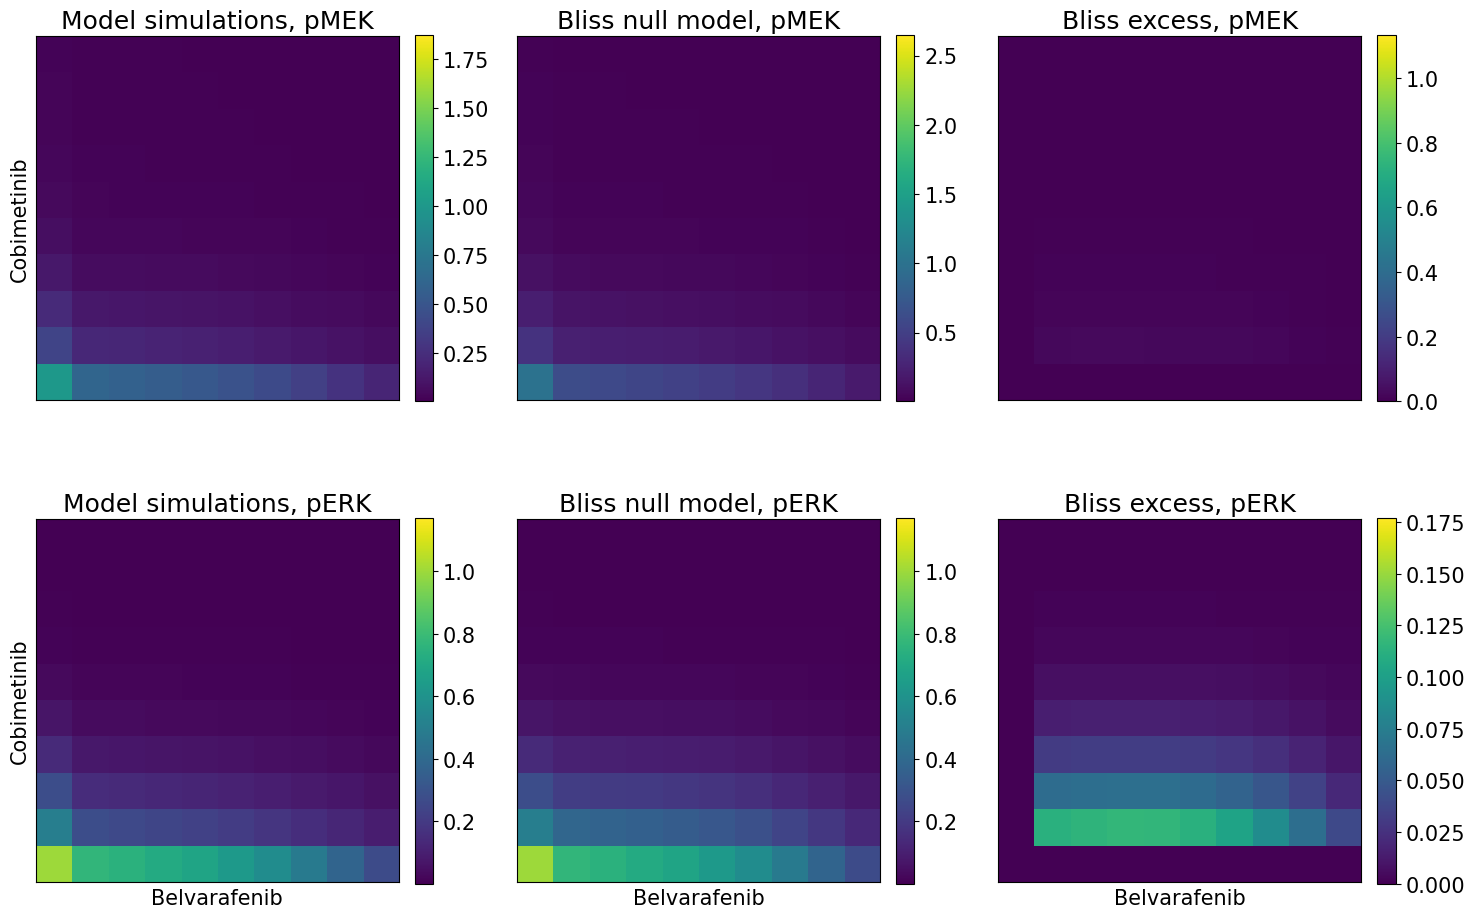

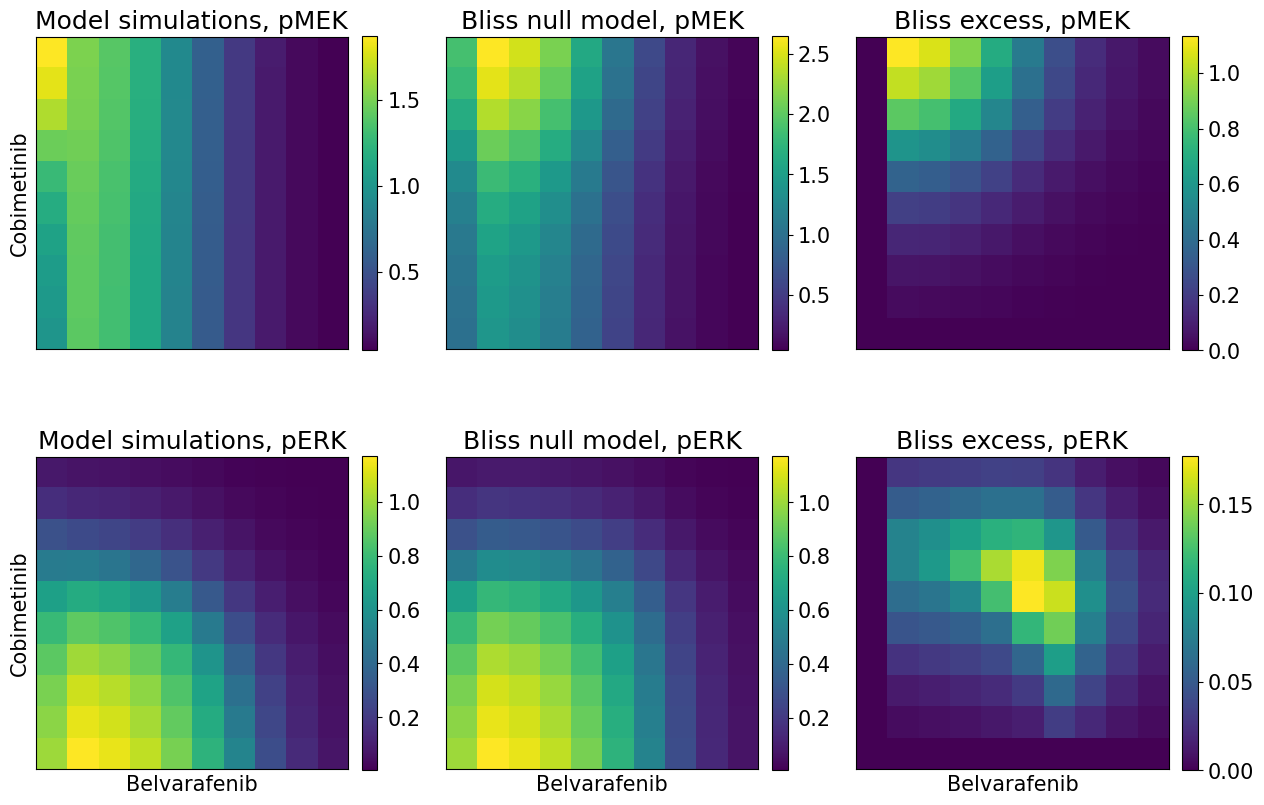

In [15]:
#import synergy package 
from synergy.combination import Bliss

# extract drugless condition
zero_dose_w_BRAF_df = dr_df_w_BRAF.iloc[0]
zero_dose_w_CRAF_df = dr_df_w_CRAF.iloc[0]


#compare synergies among set of cooperative parameters
fig_w_BRAF, ax_w_BRAF = plt.subplots(len(params), 3,figsize=(15,10))
fig_w_CRAF, ax_w_CRAF = plt.subplots(len(params), 3,figsize=(15,10))
plt_titles=['Model simulations', 'Bliss null model',  'Bliss excess'];

for i in range(len(params)):
    print(params[i])
    #create and fit the Bliss models
    bliss_w_BRAF = Bliss()
    bliss_w_CRAF = Bliss()
    D1_w_CRAF=dr_df_w_CRAF["RAFi_0_uM"].to_numpy();
    D2_w_CRAF=dr_df_w_CRAF["MEKi_0_uM"].to_numpy(); 
    E_sim_n_CRAF=dr_df_w_CRAF[params[i]].to_numpy();
    
    D1_w_BRAF=dr_df_w_BRAF["RAFi_0_uM"].to_numpy();
    D2_w_BRAF=dr_df_w_BRAF["MEKi_0_uM"].to_numpy(); 
    E_sim_w_BRAF=dr_df_w_BRAF[params[i]].to_numpy();
    
    bliss_w_CRAF.fit(D1_w_CRAF,D2_w_CRAF, dr_df_w_CRAF[params[i]]/zero_dose_w_CRAF_df[params[i]]);
    bliss_w_BRAF.fit(D1_w_BRAF,D2_w_BRAF, dr_df_w_BRAF[params[i]]/zero_dose_w_BRAF_df[params[i]]);
    
    #reshape E_sim to matrix
    dr_df_mat_w_BRAF = dr_df_w_BRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
    matrix_w_BRAF = dr_df_mat_w_BRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
    matrix_w_BRAF = matrix_w_BRAF/zero_dose_w_BRAF_df[params[i]]
    
    dr_df_mat_w_CRAF = dr_df_w_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
    matrix_w_CRAF = dr_df_mat_w_CRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
    matrix_w_CRAF = matrix_w_CRAF/zero_dose_w_CRAF_df[params[i]]
    
    #extract bliss reference and bliss excess
    E_mat_bliss_ref_w_BRAF=np.rot90(bliss_w_BRAF.reference.reshape(np.shape(matrix_w_BRAF)));
    E_mat_bliss_syn_w_BRAF=np.rot90(bliss_w_BRAF.synergy.reshape(np.shape(matrix_w_BRAF)));
    matrix_w_BRAF = np.rot90(matrix_w_BRAF)
    
    E_mat_bliss_ref_w_CRAF=np.rot90(bliss_w_CRAF.reference.reshape(np.shape(matrix_w_CRAF)));
    E_mat_bliss_syn_w_CRAF=np.rot90(bliss_w_CRAF.synergy.reshape(np.shape(matrix_w_CRAF)));
    matrix_w_CRAF = np.rot90(matrix_w_CRAF)

    
    max_simulation = np.max(np.concatenate((matrix_w_BRAF,matrix_w_CRAF)))
    max_excess = np.max(np.concatenate((E_mat_bliss_ref_w_BRAF,E_mat_bliss_ref_w_CRAF)))
    max_syn = np.max(np.concatenate((E_mat_bliss_syn_w_BRAF,E_mat_bliss_syn_w_CRAF)))
    condition_max = [max_simulation,max_excess,max_syn]
    
    Es_w_BRAF=[matrix_w_BRAF, E_mat_bliss_ref_w_BRAF, E_mat_bliss_syn_w_BRAF];
    Es_w_CRAF=[matrix_w_CRAF, E_mat_bliss_ref_w_CRAF, E_mat_bliss_syn_w_CRAF];
    print(E_mat_bliss_syn_n_CRAF)
    for j in range(len(plt_titles)):
        im=ax_w_BRAF[i,j].imshow(Es_w_BRAF[j], extent=[0, 1, 0, 1],vmax = condition_max[j])
        fig_w_BRAF.colorbar(im, ax=ax_w_BRAF[i,j], fraction=0.046, pad=0.04)
        ax_w_BRAF[i,j].set_xticks([])
        ax_w_BRAF[i,j].set_yticks([])
        ax_w_BRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
        if (i==len(params)-1):    
            ax_w_BRAF[i,j].set_xlabel('Belvarafenib')
        if (j==0):    
            ax_w_BRAF[i,j].set_ylabel('Cobimetinib')
            
        im=ax_w_CRAF[i,j].imshow(Es_w_CRAF[j], extent=[0, 1, 0, 1],vmax = condition_max[j])
        fig_w_CRAF.colorbar(im, ax=ax_w_CRAF[i,j], fraction=0.046, pad=0.04)
        ax_w_CRAF[i,j].set_xticks([])
        ax_w_CRAF[i,j].set_yticks([])
        ax_w_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
        if (i==len(params)-1):    
            ax_w_CRAF[i,j].set_xlabel('Belvarafenib')
        if (j==0):    
            ax_w_CRAF[i,j].set_ylabel('Cobimetinib')
fig_w_BRAF.subplots_adjust(wspace=0, hspace=0)
fig_w_BRAF.tight_layout()
fig_w_BRAF.savefig("figures/heatmaps/brange_RAFi_MEKi_BRAFV600E.svg",format='svg')
#fig_w_CRAF.subplots_adjust(wspace=0, hspace=0)
#fig_w_CRAF.tight_layout()
#fig_w_CRAF.savefig("figures/heatmaps/brange_RAFi_MEKi_with_SOS_feedback_and_CRAF_feedback.svg",format='svg')




In [ ]:
#import synergy package 
from synergy.combination import Bliss

# extract drugless condition
zero_dose_n_CRAF_df = dr_df_w_CRAF.iloc[0]
zero_dose_w_CRAF_df = dr_df_BRAFV600E.iloc[0]


#compare synergies among set of cooperative parameters
fig_n_CRAF, ax_n_CRAF = plt.subplots(len(params), 3,figsize=(15,10))
fig_w_CRAF, ax_w_CRAF = plt.subplots(len(params), 3,figsize=(15,10))
plt_titles=['Model simulations', 'Bliss null model',  'Bliss excess'];

for i in range(len(params)):
    print(params[i])
    #create and fit the Bliss models
    bliss_n_CRAF = Bliss()
    bliss_w_CRAF = Bliss()
    D1_n_CRAF=dr_df_w_CRAF["RAFi_0_uM"].to_numpy();
    D2_n_CRAF=dr_df_w_CRAF["MEKi_0_uM"].to_numpy(); 
    E_sim_n_CRAF=dr_df_w_CRAF[params[i]].to_numpy();
    
    D1_w_CRAF=dr_df_BRAFV600E["RAFi_0_uM"].to_numpy();
    D2_w_CRAF=dr_df_BRAFV600E["MEKi_0_uM"].to_numpy(); 
    E_sim_w_CRAF=dr_df_BRAFV600E[params[i]].to_numpy();
    
    bliss_n_CRAF.fit(D1_n_CRAF,D2_n_CRAF, dr_df_w_CRAF[params[i]]/zero_dose_n_CRAF_df[params[i]]);
    bliss_w_CRAF.fit(D1_w_CRAF,D2_w_CRAF, dr_df_BRAFV600E[params[i]]/zero_dose_w_CRAF_df[params[i]]);
    
    #reshape E_sim to matrix
    dr_df_mat_n_CRAF = dr_df_w_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
    matrix_n_CRAF = dr_df_mat_n_CRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
    matrix_n_CRAF = matrix_n_CRAF/zero_dose_n_CRAF_df[params[i]]
    
    dr_df_mat_w_CRAF = dr_df_BRAFV600E.set_index(["RAFi_0_uM","MEKi_0_uM"])
    matrix_w_CRAF = dr_df_mat_w_CRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
    matrix_w_CRAF = matrix_w_CRAF/zero_dose_w_CRAF_df[params[i]]
    
    #extract bliss reference and bliss excess
    E_mat_bliss_ref_n_CRAF=np.rot90(bliss_n_CRAF.reference.reshape(np.shape(matrix_n_CRAF)));
    E_mat_bliss_syn_n_CRAF=np.rot90(bliss_n_CRAF.synergy.reshape(np.shape(matrix_n_CRAF)));
    matrix_n_CRAF = np.rot90(matrix_n_CRAF)
    
    E_mat_bliss_ref_w_CRAF=np.rot90(bliss_w_CRAF.reference.reshape(np.shape(matrix_w_CRAF)));
    E_mat_bliss_syn_w_CRAF=np.rot90(bliss_w_CRAF.synergy.reshape(np.shape(matrix_w_CRAF)));
    matrix_w_CRAF = np.rot90(matrix_w_CRAF)

    
    max_simulation = np.max(np.concatenate((matrix_n_CRAF,matrix_w_CRAF)))
    max_excess = np.max(np.concatenate((E_mat_bliss_ref_n_CRAF,E_mat_bliss_ref_w_CRAF)))
    max_syn = np.max(np.concatenate((E_mat_bliss_syn_w_CRAF,E_mat_bliss_syn_w_CRAF)))
    condition_max = [max_simulation,max_excess,max_syn]
    
    Es_n_CRAF=[matrix_n_CRAF, E_mat_bliss_ref_n_CRAF, E_mat_bliss_syn_n_CRAF];
    Es_w_CRAF=[matrix_w_CRAF, E_mat_bliss_ref_w_CRAF, E_mat_bliss_syn_w_CRAF];
    
    for j in range(len(plt_titles)):
        im=ax_n_CRAF[i,j].imshow(Es_n_CRAF[j], extent=[0, 1, 0, 1])
        fig_n_CRAF.colorbar(im, ax=ax_n_CRAF[i,j], fraction=0.046, pad=0.04)
        ax_n_CRAF[i,j].set_xticks([])
        ax_n_CRAF[i,j].set_yticks([])
        ax_n_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
        if (i==len(params)-1):    
            ax_n_CRAF[i,j].set_xlabel('Belvarafenib')
        if (j==0):    
            ax_n_CRAF[i,j].set_ylabel('Cobimetinib')
            
        im=ax_w_CRAF[i,j].imshow(Es_w_CRAF[j], extent=[0, 1, 0, 1])
        fig_w_CRAF.colorbar(im, ax=ax_w_CRAF[i,j], fraction=0.046, pad=0.04)
        ax_w_CRAF[i,j].set_xticks([])
        ax_w_CRAF[i,j].set_yticks([])
        ax_w_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
        if (i==len(params)-1):    
            ax_w_CRAF[i,j].set_xlabel('Belvarafenib')
        if (j==0):    
            ax_w_CRAF[i,j].set_ylabel('Cobimetinib')
fig_n_CRAF.subplots_adjust(wspace=0, hspace=0)
fig_n_CRAF.tight_layout()
fig_n_CRAF.savefig("figures/heatmaps/brange_uscale_RAFi_MEKi_with_SOS_feedback_no_CRAF_feedback.svg",format='svg')
fig_w_CRAF.subplots_adjust(wspace=0, hspace=0)
fig_w_CRAF.tight_layout()
fig_w_CRAF.savefig("figures/heatmaps/brange_uscale_RAFi_MEKi_with_SOS_feedback_and_CRAF_feedback.svg",format='svg')
